### CNN Model with Data Aumentation

CNN model provided 75% accuracy with data augmentation. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import random

import cv2

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.optimizers import Adam
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D
from keras.layers.advanced_activations import LeakyReLU 
from keras.preprocessing.image import ImageDataGenerator



np.random.seed(42)

Using TensorFlow backend.


In [2]:

nrows = 150
ncolumns = 150
channels = 3

def read_and_process_image(list_imgs):

    random.shuffle(list_imgs[:])
    X = []
    y = []

    for ima in list_imgs[:-1]:

        img = cv2.imread(ima,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)
        X.append(img)

        if 'Cr_' in ima:
            y.append(0)
        elif 'In_' in ima:
            y.append(1)
        elif 'Pa_' in ima:
            y.append(2)
        elif 'PS_' in ima:
            y.append(3)
        elif 'RS_' in ima:
            y.append(4)
        elif 'Sc_' in ima:
            y.append(5)
    return X, y

In [3]:
path = 'C:\\Users\\jeetp\\Desktop\\ML Course\\Final Project\\NEU surface defect database\\'
list_of_imgs = [path+'{}'.format(i) for i in os.listdir(path)] #get test images

X, y = read_and_process_image(list_of_imgs)

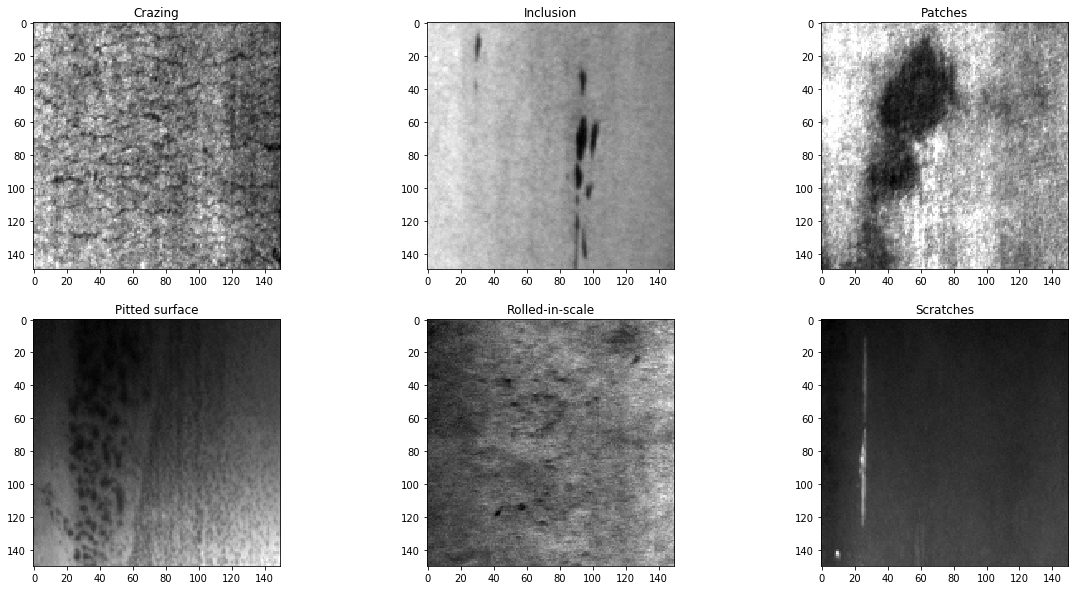

In [4]:
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 6
label = {0:'Crazing', 1:'Inclusion', 2:'Patches', 3:'Pitted surface', 4:'Rolled-in-scale', 5:'Scratches'}
n=0
for i in range(columns):
    plt.subplot(6 / columns + 1, 3, i + 1)
    plt.title(label[y[n]])
    plt.imshow(X[n], cmap='gray')
    n += 300

Text(0.5, 1.0, 'Still defects by Classification')

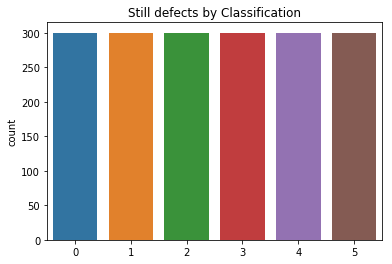

In [5]:
import seaborn as sns

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Still defects by Classification')

In [6]:
#Lets split the data into train and test set
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow.python import keras
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

X_train = X_train.reshape(X_train.shape[0], 150, 150, 1)
X_test = X_test.reshape(X_test.shape[0], 150, 150, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_test.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_test.shape)

Shape of train images is: (1440, 150, 150, 1)
Shape of validation images is: (360, 150, 150, 1)
Shape of labels is: (1440, 6)
Shape of labels is: (360, 6)


In [7]:
#The length of the train and validation data
ntrain = len(X_train)
nval = len(X_test)

batch_size = 64 

In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150,150,1)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

BatchNormalization(axis=-1)
model.add(Conv2D(64,(3, 3)))
model.add(Activation('relu'))
BatchNormalization(axis=-1)
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Fully connected layer

BatchNormalization()
model.add(Dense(512))
model.add(Activation('relu'))
BatchNormalization()
model.add(Dropout(0.2))
model.add(Dense(6))

# model.add(Convolution2D(10,3,3, border_mode='same'))
# model.add(GlobalAveragePooling2D())
model.add(Activation('softmax'))

W0818 21:05:34.831510 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 21:05:34.875461 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 21:05:34.886251 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 21:05:34.946088 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0818 21:05:35.091708 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Ana

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
activation_3 (Activation)    (None, 71, 71, 64)        0         
__________

In [10]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

W0818 21:05:58.259784 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 21:05:58.266741 13988 deprecation_wrapper.py:119] From C:\Users\jeetp\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [11]:
gen = ImageDataGenerator(rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

test_gen = ImageDataGenerator()

In [12]:
train_generator = gen.flow(X_train, y_train, batch_size=64)
test_generator = test_gen.flow(X_test, y_test, batch_size=64)

In [13]:
evaluation = model.fit_generator(train_generator, steps_per_epoch=ntrain // batch_size, epochs=10, 
                    validation_data=test_generator, validation_steps=nval // batch_size)

W0818 21:06:07.826272 13988 deprecation.py:323] From C:\Users\jeetp\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/10
22/22 [==============================] - 29s 1s/step - loss: 2.0289 - acc: 0.1911 - val_loss: 1.6777 - val_acc: 0.2562
Epoch 2/10
22/22 [==============================] - 23s 1s/step - loss: 1.5926 - acc: 0.3517 - val_loss: 1.4208 - val_acc: 0.5304
Epoch 3/10
22/22 [==============================] - 18s 822ms/step - loss: 1.3322 - acc: 0.4639 - val_loss: 1.1076 - val_acc: 0.4899
Epoch 4/10
22/22 [==============================] - 17s 794ms/step - loss: 1.2508 - acc: 0.5142 - val_loss: 1.0431 - val_acc: 0.6216
Epoch 5/10
22/22 [==============================] - 17s 789ms/step - loss: 1.0775 - acc: 0.5896 - val_loss: 0.8688 - val_acc: 0.5811
Epoch 6/10
22/22 [==============================] - 17s 788ms/step - loss: 0.7870 - acc: 0.7167 - val_loss: 0.5793 - val_acc: 0.7669
Epoch 7/10
22/22 [==============================] - 18s 815ms/step - loss: 0.5965 - acc: 0.7876 - val_loss: 0.9870 - val_acc: 0.6250
Epoch 8/10
22/22 [==============================] - 18s 810ms/step - loss: 

In [14]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

360/360 [==============================] - 2s 4ms/step

Test accuracy:  0.7555555555555555


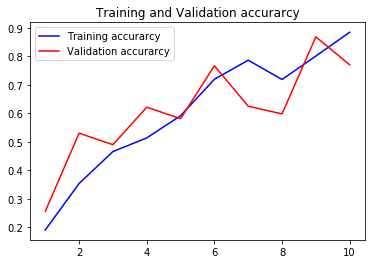

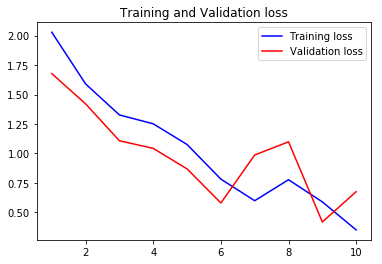

In [15]:
#lets plot the train and val curve
#get the details form the history object
acc = evaluation.history['acc']
val_acc = evaluation.history['val_acc']
loss = evaluation.history['loss']
val_loss = evaluation.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()